In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
# data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
# Four ML models for trying the dataset
# These models are chosen based on the cheatsheet from 
# https://blogs.sas.com/content/subconsciousmusings/2020/12/09/machine-learning-algorithm-use/#prettyPhoto

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
# Select features => Fit features to model => Model prediction => Model validation
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

vulnerability_data = pd.read_csv("/kaggle/input/apachevulnerabilities/finalDataset.csv")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apachevulnerabilities/finalDataset.csv


In [30]:
from sklearn.model_selection import train_test_split

# Creating the training and test data
df = pd.DataFrame(vulnerability_data)
train, test = train_test_split(df, test_size=0.2)
#print(train)

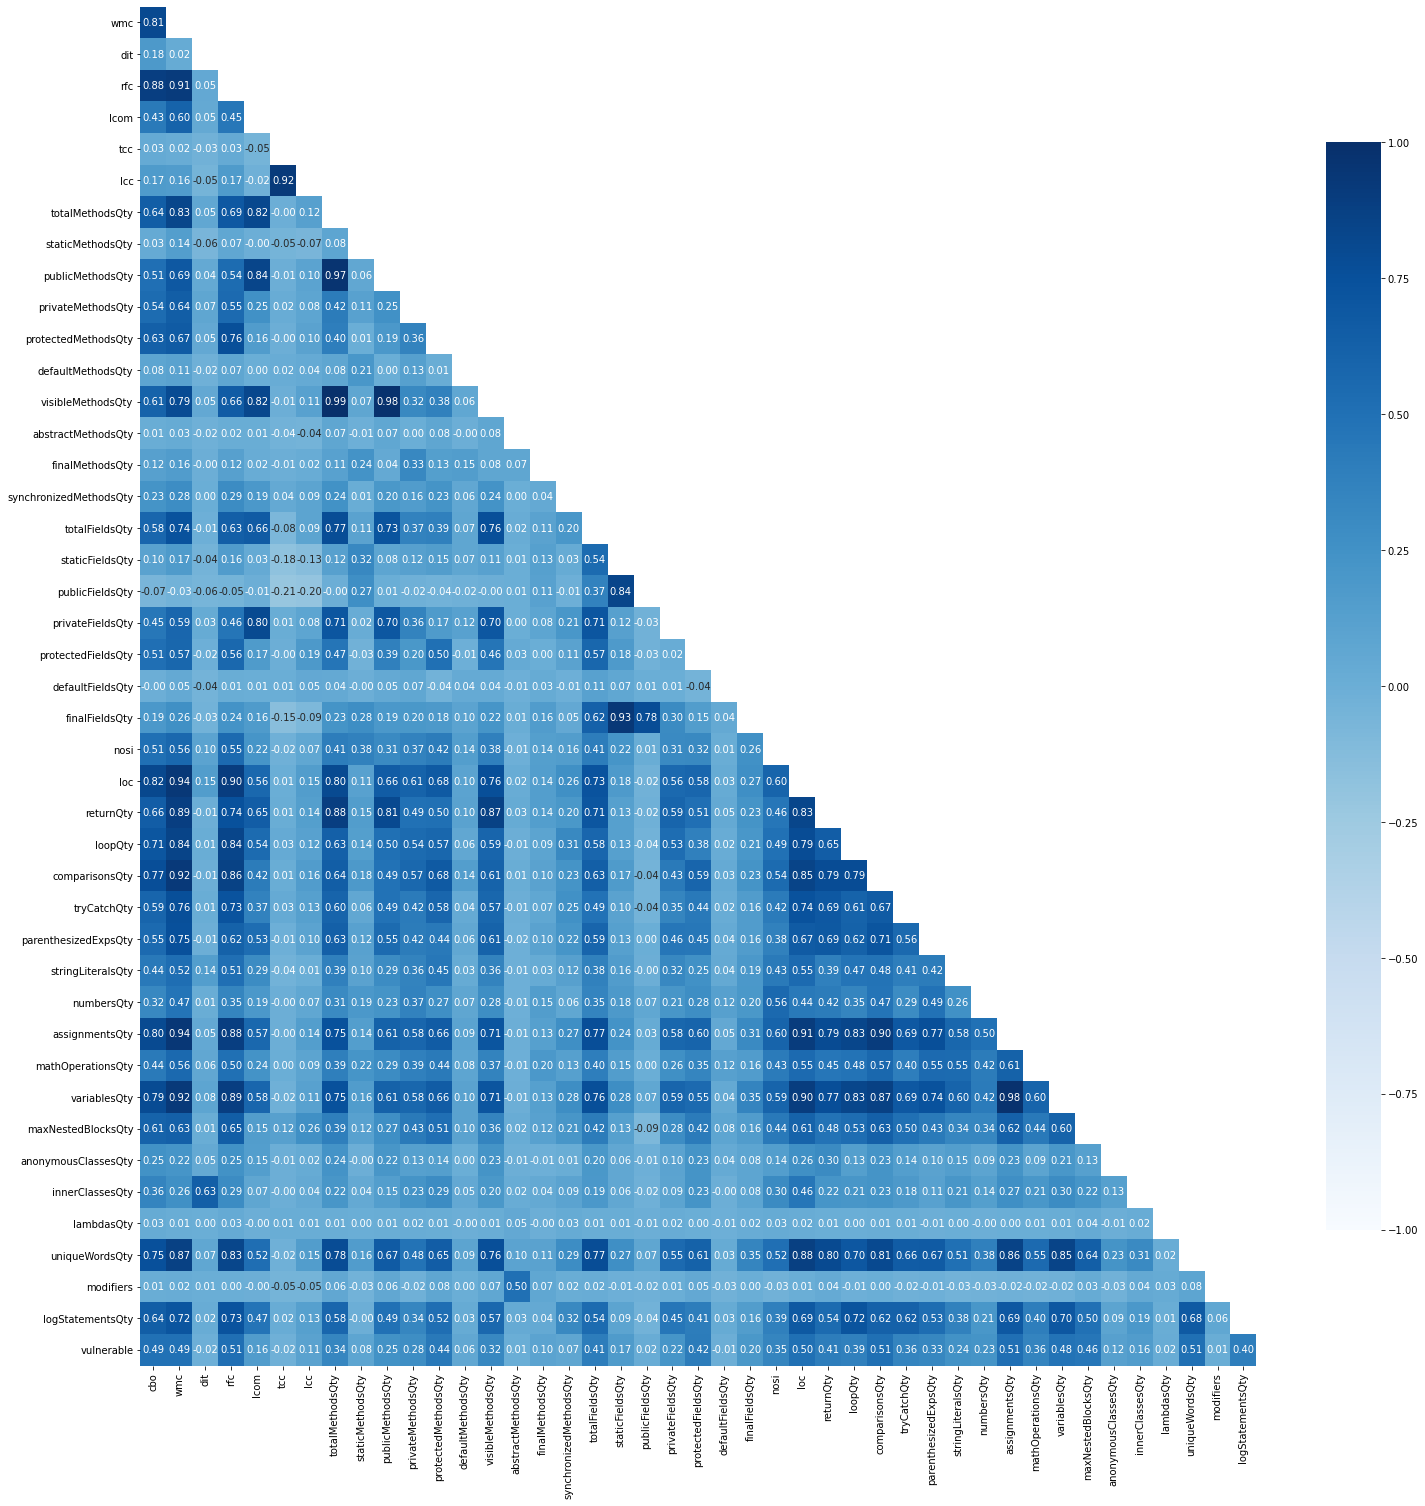

In [3]:
#vulnerability_data.head()
df.pop('synchronizedFieldsQty')
feature_columns =df.iloc[:,4:52] 
#print(feature_columns.vulnerable)

#sns.heatmap(feature_columns.corr(), center=0)

fig, ax = plt.subplots(figsize=(25, 25))
mask = np.triu(np.ones_like(feature_columns.corr(), dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = feature_columns.corr().iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

In [19]:
# Getting the features

# uniqueWordsQty which is affected by variablesQty
# rfc affected by assignmentsQty, variablesQty, loc, loopQty, comparisonsQty, cbo
# wmc affected by cbo,assignmentsQty, variablesQty, loc


train['cbo+lcom'] = train.loc['cbo'] +train.lo['lcom']
train['cbo+rfc'] = train['cbo'] + train['rfc']
train['dit+wmc'] = train['dit'] + train['wmc']
train['dit+lcom'] = train['dit'] + train['lcom']
train['rfc+wmc'] = train['rfc'] + train['wmc']
test['cbo+lcom'] =test['cbo'] +test['lcom']
test['cbo+rfc'] = test['cbo']+ test['rfc']
test['dit+wmc'] = test['dit'] + test['wmc']
test['dit+lcom'] = test['dit'] + test['lcom']
test['rfc+wmc'] = test['rfc'] + test['wmc']


ValueError: No axis named cbo for object type DataFrame

In [27]:
features = ['loc','cbo','rfc','wmc','variablesQty','assignmentsQty','loopQty','uniqueWordsQty','comparisonsQty','loopQty','returnQty','tcc','dit','logStatementsQty']
# 
X =train[features]
test_X = test[features]
y = train.vulnerable
test_Y = test.vulnerable

In [32]:
# Decision Tree Classifier (For explainable)
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X, y)

predictions = dt_model.predict(test_X)
print(accuracy_score(predictions,test_Y))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_Y, predictions)
print(cm)
from sklearn.metrics import r2_score
print(r2_score(test_Y, predictions))

0.9807613589848547
[[1842   31]
 [  16  554]]
0.8924504266539279


In [31]:
# Logistic Regression (For explainable)
lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X, y)

predictions = lr_model.predict(test_X)

print(accuracy_score(predictions,test_Y))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_Y, predictions)
print(cm)
from sklearn.metrics import r2_score
print(r2_score(test_Y, predictions))

0.8440442079410561
[[1820   53]
 [ 328  242]]
0.12816196925843704


In [33]:
# Naive Bayes Algorithm (Since the dataset is a bit too large too)
nb_model = GaussianNB()
nb_model.fit(X,y)

predictions = nb_model.predict(test_X)

print(accuracy_score(predictions,test_Y))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_Y, predictions)
print(cm)
from sklearn.metrics import r2_score
print(r2_score(test_Y, predictions))

0.8403602128530495
[[1780   93]
 [ 297  273]]
0.10756737010706152
